## Question1

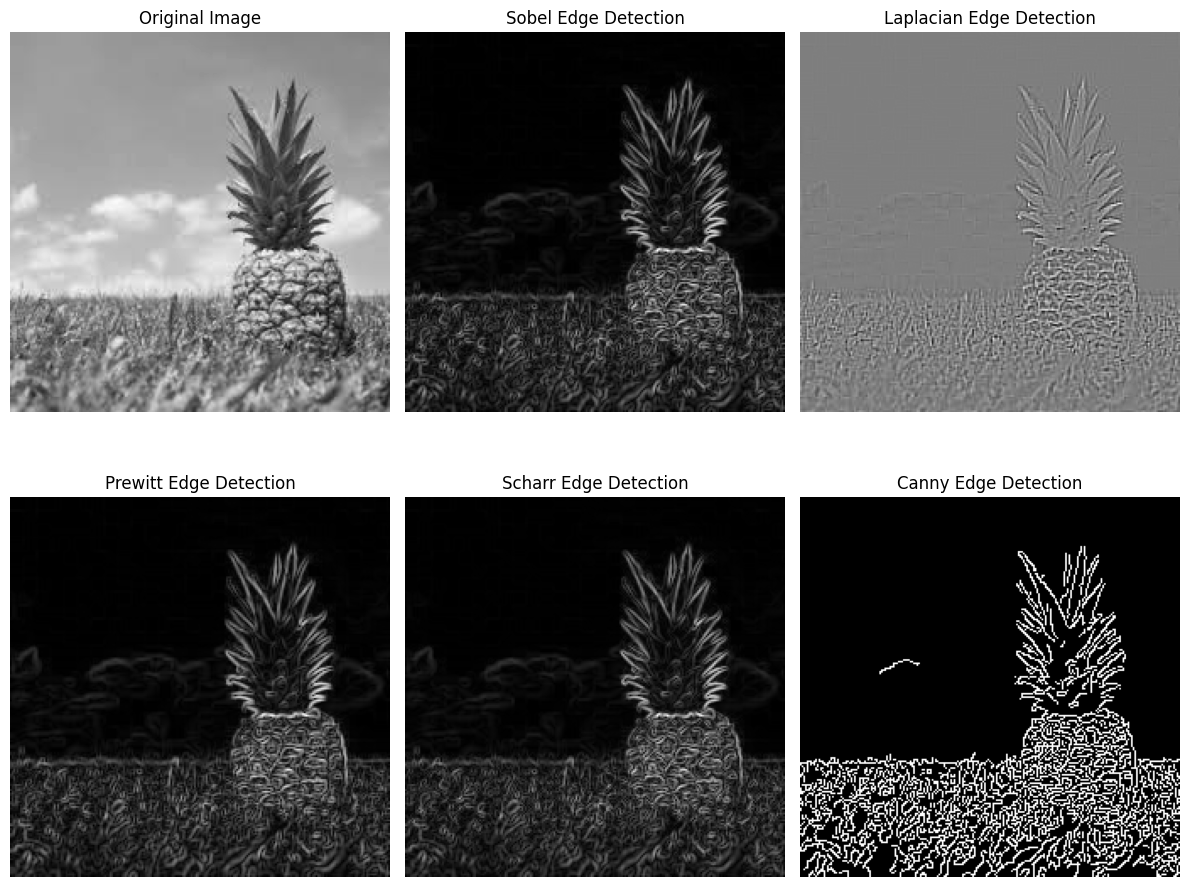

In [2]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt


image = cv.imread('images/pineapple.jfif', cv.IMREAD_GRAYSCALE)

# Apply Sobel edge detector
sobel_x = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(image, cv.CV_64F, 0, 1, ksize=3)
sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2)

# Apply Laplacian edge detector
laplacian_edges = cv.Laplacian(image, cv.CV_64F, ksize=3)

# Apply Prewitt edge detector
kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
prewitt_x = cv.filter2D(image, cv.CV_64F, kernel_x)
prewitt_y = cv.filter2D(image, cv.CV_64F, kernel_y)
prewitt_edges = np.sqrt(prewitt_x**2 + prewitt_y**2)

# Apply Scharr derivative edge detector
scharr_x = cv.Scharr(image, cv.CV_64F, 1, 0)
scharr_y = cv.Scharr(image, cv.CV_64F, 0, 1)
scharr_edges = np.sqrt(scharr_x**2 + scharr_y**2)

# Apply Canny edge detector
canny_edges = cv.Canny(image, threshold1=100, threshold2=200)

# Display the images
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(laplacian_edges, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(prewitt_edges, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(scharr_edges, cmap='gray')
plt.title('Scharr Edge Detection')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()


Comment on result: 
Sobel Edge Detection:Better at detect edges that are not aligned with the image axes

Laplacian Edge Detection:thicker edges

Prewitt Edge Detection: Better at detect diagonal edges

Scharr Edge Detection: Similar to Sobel but provides better edge detection for diagonal edges.

Canny Edge Detection: edges are highlighted in white and the rest of the image is black

## Question2

In [3]:

# Load the image
image = cv.imread('images/electronic.jfif')
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply thresholding to isolate white regions
ret, thresholded = cv.threshold(gray_image, 200, 255, cv.THRESH_BINARY)

# Find contours in the thresholded image
contours, _ = cv.findContours(thresholded, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around white objects
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    area = cv.contourArea(contour)
    if area > 1000:  # Filter out small noise regions
        cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with bounding boxes
cv.imshow('Identified Objects', image)
cv.waitKey(0)
cv.destroyAllWindows()


## Question 3

In [4]:
image = cv.imread('images/clock.jpg', cv.IMREAD_GRAYSCALE)

# Apply thresholding to isolate white regions
ret, thresholded = cv.threshold(image, 235, 255, cv.THRESH_BINARY)

# Find contours in the thresholded image
contours, _ = cv.findContours(thresholded, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image to draw on
image_with_boxes = cv.cvtColor(image, cv.COLOR_GRAY2BGR)

# Draw circular bounding boxes around white clock objects
for contour in contours:
    area = cv.contourArea(contour)
    if area > 3000:  # Filter out small noise regions
        # Find the minimum enclosing circle
        (x, y), radius = cv.minEnclosingCircle(contour)
        center = (int(x), int(y))
        radius = int(radius)
        cv.circle(image_with_boxes, center, radius, (0, 255, 0), 2)

# Display the image with circular bounding boxes
cv.imshow('Identified White Clock (Circular Bounding Boxes)', image_with_boxes)
cv.waitKey(0)
cv.destroyAllWindows()
